In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.generate_trees_scores_DEBUG import two_tail_prob

In [3]:
def get_last_detection_id(br):
    return np.array(br)[np.logical_not(np.isnan(br))][-1]

In [4]:
def update_hyps_scores(det, hyps, scores, probz, bg_prob):
    
    detection_id = det.iloc[0].id
    detection_time = det.iloc[0].time
    detection_pos = det.iloc[0].object_location
    
    new_hyps = []
    new_scores = []

    # go through hypotheses
    for hyp_i, hyp in enumerate(hyps):
        existing_score = scores[hyp_i]

        # scenario where the new detection is a new individual
        # pad existing branches

        new_scen = [ h + [np.nan] for h in hyp] + [list(np.empty(len(hyp[0]))*np.nan) + [detection_id]]
        new_hyps.append(new_scen)

        # score is the existing + background prob
        new_scores.append(existing_score + bg_prob)

        # go through the branches in the hypothesis
        for i, branch in enumerate(hyp):

            # scenario where the new detection is a repeat
            repeat_scen = [branch + [detection_id]]
            repeat_scen += [hyp[j] + [np.nan]  for j in range(len(hyp)) if j!=i]

            new_hyps.append(repeat_scen)
            # calculate score
            last_detection = get_last_detection_id(branch)
            new_scores.append( existing_score +probz[int(last_detection), detection_id])
    return new_hyps, new_scores

In [33]:
detections = pd.DataFrame()
detections["id"] = [0, 1, 2,3,4,5,6]
detections["time"] = [0, 1,2, 3, 4, 5,6]
detections["object_location"] = [0, 1, 2, 3, 4, 5, 6]

In [97]:
faunastep = 0.2
n_dets = len(detections)
dists = np.zeros((len(detections), len(detections)))
Dtime = np.zeros((len(detections), len(detections)))
for i in range(n_dets):
    for j in range(n_dets):
        dists[i, j] = np.abs(detections.loc[i]["object_location"] - detections.loc[j]["object_location"])
        Dtime[i, j] = np.abs(detections.loc[i]["time"] - detections.loc[j]["time"])

z_stat = np.divide(dists, faunastep * Dtime)
probz = two_tail_prob(z_stat)


/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [98]:
bg_prob = 0.1

In [99]:
probz

array([[           nan, 5.73303144e-07, 5.73303144e-07, 5.73303144e-07,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07,            nan, 5.73303144e-07, 5.73303144e-07,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07,            nan, 5.73303144e-07,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07,            nan,
        5.73303144e-07, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 5.73303144e-07,
                   nan, 5.73303144e-07, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 5.73303144e-07,
        5.73303144e-07,            nan, 5.73303144e-07],
       [5.73303144e-07, 5.73303144e-07, 5.73303144e-07, 5.73303144e-07,
        5.73303144e-07, 5.73303144e-07,            nan]])

In [100]:
detections

,id,time,object_location
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,6,6,6


After time 0 we have one hypothesis

In [101]:
hyps = [[[0]]]

In [102]:
scores = []
scores.append(bg_prob)

In [103]:
scores

[0.1]

In [104]:
new_hyps = hyps
new_scores = scores

for t in range(1,7):
    new_hyps, new_scores = update_hyps_scores(detections[detections.time==t], new_hyps, new_scores, probz, bg_prob)
new_hyps, new_scores

([[[0, nan, nan, nan, nan, nan, nan],
   [nan, 1, nan, nan, nan, nan, nan],
   [nan, nan, 2, nan, nan, nan, nan],
   [nan, nan, nan, 3, nan, nan, nan],
   [nan, nan, nan, nan, 4, nan, nan],
   [nan, nan, nan, nan, nan, 5, nan],
   [nan, nan, nan, nan, nan, nan, 6]],
  [[0, nan, nan, nan, nan, nan, 6],
   [nan, 1, nan, nan, nan, nan, nan],
   [nan, nan, 2, nan, nan, nan, nan],
   [nan, nan, nan, 3, nan, nan, nan],
   [nan, nan, nan, nan, 4, nan, nan],
   [nan, nan, nan, nan, nan, 5, nan]],
  [[nan, 1, nan, nan, nan, nan, 6],
   [0, nan, nan, nan, nan, nan, nan],
   [nan, nan, 2, nan, nan, nan, nan],
   [nan, nan, nan, 3, nan, nan, nan],
   [nan, nan, nan, nan, 4, nan, nan],
   [nan, nan, nan, nan, nan, 5, nan]],
  [[nan, nan, 2, nan, nan, nan, 6],
   [0, nan, nan, nan, nan, nan, nan],
   [nan, 1, nan, nan, nan, nan, nan],
   [nan, nan, nan, 3, nan, nan, nan],
   [nan, nan, nan, nan, 4, nan, nan],
   [nan, nan, nan, nan, nan, 5, nan]],
  [[nan, nan, nan, 3, nan, nan, 6],
   [0, nan, nan,

In [105]:
new_scores

[0.7,
 0.6000005733031438,
 0.6000005733031438,
 0.6000005733031438,
 0.6000005733031438,
 0.6000005733031438,
 0.6000005733031438,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.6000005733031438,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.5000011466062877,
 0.40000171990943156,
 0.40000171990943156,
 0.40000171990943156,
 0.40000171990943156,
 0.

In [106]:
import matplotlib.pyplot as plt

In [107]:
[len(h) for h in new_hyps]

[7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,


/home/nader/Projects/thesis/benthic_targets/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


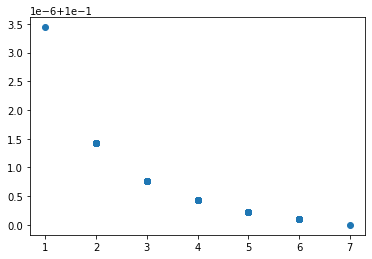

In [108]:
fig, ax = plt.subplots()
ax.scatter([len(h) for h in new_hyps], np.divide(new_scores,[len(h) for h in new_hyps]))
fig.show()